In [1]:
### test analysis module
os.getcwd()
import pydrodelta.analysis 
import json
import matplotlib.pyplot as plt


In [2]:

#### instantiate boundarySet class from config file (.xml)
bordes_config = json.load(open("pydrodelta_config/288_short.json"))
bordes_set = pydrodelta.analysis.BoundarySet(bordes_config)
bordes_set


In [3]:

bordes_set.loadData()
bordes_set.regularize()


In [4]:

bordes_set.applyOffset()


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


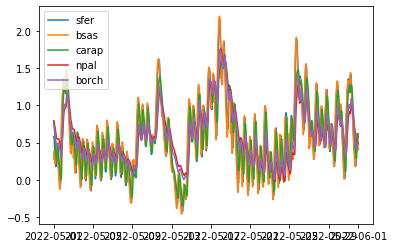

In [5]:

df = bordes_set.boundaries[0].series[0].obs_df.join(bordes_set.boundaries[0].series[1].obs_df,how='left',rsuffix='_1')
df = df.join(bordes_set.boundaries[0].series[2].obs_df,how='left',rsuffix='_2')
df = df.join(bordes_set.boundaries[0].series[3].obs_df,how='left',rsuffix='_3')
df = df.join(bordes_set.boundaries[0].series[4].obs_df,how='left',rsuffix='_4')
df["diff_1"] = df["valor"] - df["valor_1"]
df["diff_2"] = df["valor"] - df["valor_2"]
df["diff_3"] = df["valor"] - df["valor_3"]
df["diff_4"] = df["valor"] - df["valor_4"]
plt.plot(df.index,df["valor"],label="sfer")
plt.plot(df.index,df["valor_1"],label="bsas")
plt.plot(df.index,df["valor_2"],label="carap")
plt.plot(df.index,df["valor_3"],label="npal")
plt.plot(df.index,df["valor_4"],label="borch")
plt.legend()
# df = df.reset_index() # .plot(y="valor")
# df.plot(kind="scatter",x="timestart",y="valor")
plt.show()


In [6]:
means = [df["diff_1"].mean(),df["diff_2"].mean(),df["diff_3"].mean(),df["diff_4"].mean()]
means



[-0.005666347041693343,
 -0.0014999625131203872,
 0.0009008097165991381,
 -0.001883753186384792]